### Problems

#### 1D potential

- In molecular simulations, we often want to sample from the **Boltzmann distribution** $P(x) \propto e^{-V(x)/k_BT}$.
- Langevin dynamics enables us to do this by modeling the effects of both **deterministic forces** (from the potential) and **random thermal fluctuations**.
- Write a Python function using NumPy to simulate a 1D system under Langevin dynamics for the following potential:

$$
V(x) = Ax^2 + Bx^3 + Cx^4
$$

You should:

1. Implement Langevin dynamics to evolve position and velocity over time.
2. Allow inputs for:
   - Coefficients A, B, C
   - Initial position and velocity
   - Time step `dt`, number of steps
   - Temperature `kBT` and friction coefficient `gamma`
3. Store all positions and plot a **normalized histogram** (probability density) after the simulation.
4. Try the following setups:
   - **Double well**: A = -1, B = 0, C = 1
   - **Asymmetric well**: A = -1, B = -1, C = 1
   - Vary initial positions and explain what changes


5. Compare your histograms with $e^{-V(x)/k_BT}$. Do they match?
6.  What happens if `gamma` is very small? What about very large?

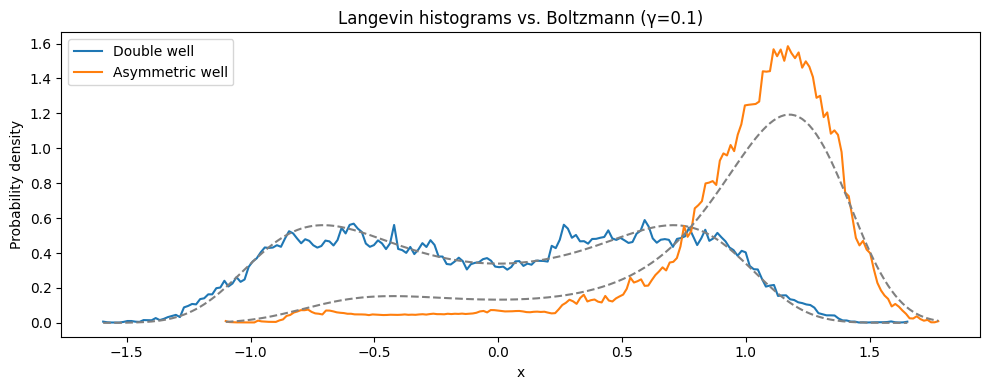

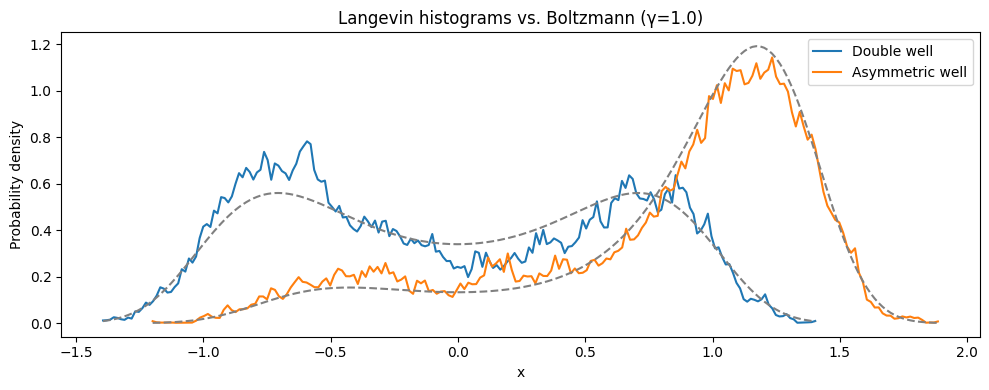

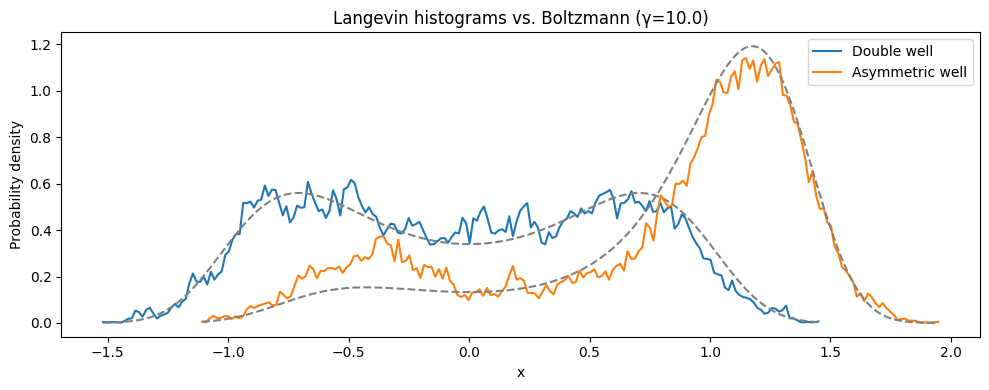

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def langevin_1d(A, B, C, x0, v0, dt, n_steps, kT, gamma):
    """Simulate 1D Langevin dynamics for V(x)=A x^2 + B x^3 + C x^4 (m=1)."""
    positions = np.zeros(n_steps)
    velocities = np.zeros(n_steps)
    x, v = x0, v0
    sqrt_term = np.sqrt(2 * gamma * kT * dt)
    for i in range(n_steps):
        F = -(2*A*x + 3*B*x**2 + 4*C*x**3)
        v += (F - gamma*v)*dt + sqrt_term * np.random.randn()
        x += v * dt
        positions[i] = x
        velocities[i] = v
    return positions, velocities

# Simulation parameters
dt      = 0.005
n_steps = 200_000
kT      = 0.5
x0, v0  = 0.0, 0.0

cases = {
    "Double well":      (-1.0,  0.0, 1.0),
    "Asymmetric well":  (-1.0, -1.0, 1.0),
}

gammas = [0.1, 1.0, 10.0]

for gamma in gammas:
    plt.figure(figsize=(10,4))
    for label, (A,B,C) in cases.items():
        pos, _ = langevin_1d(A, B, C, x0, v0, dt, n_steps, kT, gamma)
        pos_eq = pos[n_steps//5:]
        hist_vals, bins = np.histogram(pos_eq, bins=200, density=True)
        centers = (bins[:-1] + bins[1:]) / 2
        plt.plot(centers, hist_vals, label=f"{label}")
        boltz = np.exp(- (A*centers**2 + B*centers**3 + C*centers**4)/kT)
        Z = np.trapezoid(boltz, centers)
        plt.plot(centers, boltz/Z, '--', color='gray')

    plt.xlabel('x')
    plt.ylabel('Probability density')
    plt.title(f'Langevin histograms vs. Boltzmann (γ={gamma})')
    plt.legend()
    plt.tight_layout()
    plt.show()